# Betrachtung der einzelnen Merkmale

## Laden

Laden der Bibliotheken

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

Laden der Daten

In [51]:
df = pd.read_csv('../Loading/df_PreiseStationen.csv')

/var/folders/_9/fyqnr96j0q7_tlytmj22wy8c0000gn/T/ipykernel_77779/2813724428.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Loading/df_PreiseStationen.csv')


## Erster Überblick

In [52]:
df.head()

,Unnamed: 0,station_uuid,hour,diesel,e5,e10,dieselchange,e5change,e10change,brand,...,name,post_code,latitude,longitude,first_active,openingtimes_json,date,weekday,start_time,end_time
0,0,005056ba-7cb6-1ed2-bceb-519b93268d12,23:00:00,1.699,1.769,1.709,1.0,1.0,1.0,ORLEN,...,ORLEN Tankstelle,32427,52.288749,8.898652,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":31,""period...",2023-12-31,Sunday,08:00,23:00
1,1,005056ba-7cb6-1ed2-bceb-519b93268d12,05:00:00,1.769,1.849,1.789,1.0,1.0,1.0,ORLEN,...,ORLEN Tankstelle,32427,52.288749,8.898652,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":31,""period...",2024-01-01,Monday,06:00,23:00
2,2,005056ba-7cb6-1ed2-bceb-519b93268d12,06:00:00,1.759,1.839,1.779,1.0,1.0,1.0,ORLEN,...,ORLEN Tankstelle,32427,52.288749,8.898652,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":31,""period...",2024-01-01,Monday,06:00,23:00
3,3,005056ba-7cb6-1ed2-bceb-519b93268d12,07:00:00,1.734,1.794,1.734,1.0,1.0,1.0,ORLEN,...,ORLEN Tankstelle,32427,52.288749,8.898652,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":31,""period...",2024-01-01,Monday,06:00,23:00
4,4,005056ba-7cb6-1ed2-bceb-519b93268d12,08:00:00,1.744,1.804,1.744,1.0,1.0,1.0,ORLEN,...,ORLEN Tankstelle,32427,52.288749,8.898652,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":31,""period...",2024-01-01,Monday,06:00,23:00


Erste Auffälligkeiten bei der Betrachtung des Datensatzes:
Unnamed: 0 zeigt den Index, liefert anscheinend keinen Mehrwert


In [53]:
print(df.count())

Unnamed: 0           73589
station_uuid         73589
hour                 73589
diesel               73589
e5                   73589
e10                  73589
dieselchange         73589
e5change             73589
e10change            73589
brand                68097
city                 73589
street               73589
house_number         67120
name                 73589
post_code            73589
latitude             73589
longitude            73589
first_active         73589
openingtimes_json    73589
date                 73589
weekday              73589
start_time           43512
end_time             43512
dtype: int64


Auffälligkeiten:
- Es gibt 73589 Zeilen in dem Datensatz
- 'brand' hat fehlende Werte (5497 fehlende Werte)
- 'house_number' hat fehlende Werte (6469 fehlende Werte)
- 'start_time' und 'end_time' haben fehlende Werte, beide gleich viele (30077 fehlende Werte)

## Detailliertere Betrachtung einzelner Merkmale

### Brand

In [54]:
print(f" Die Tankstelle {df[df['brand'].isna()]['station_uuid'].unique()} hat kein Brand")

 Die Tankstelle ['fa7e7b54-d16f-437d-b7de-c39f75a7e4f9'] hat kein Brand


brand
ORLEN                   12976
STAR                     6516
OIL!                     6469
Westfalen                6406
Markant                  6284
Calpam                   6171
CLASSIC                  6016
TAS                      5838
Shell                    5649
ARAL                     5647
NaN                      5492
Iboil Tankstellen UG      125
Name: count, dtype: int64


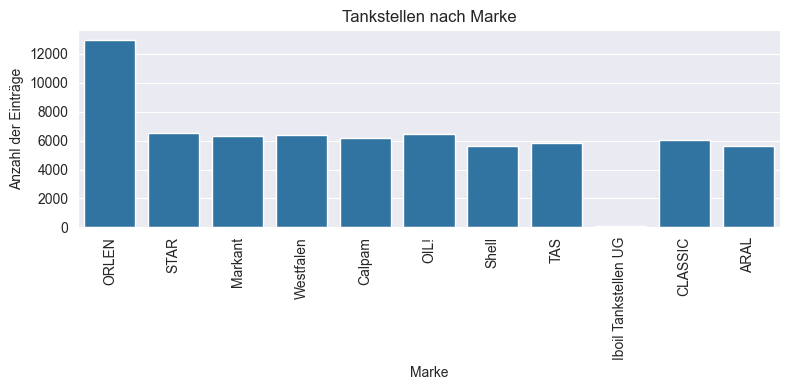

In [55]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.countplot.html
print(df['brand'].value_counts(dropna=False))
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x=df['brand'])

plt.title("Tankstellen nach Marke")
plt.xticks(rotation=90)
plt.xlabel("Marke")
plt.ylabel("Anzahl der Einträge")
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Eine Tankstelle hat keinen Brand.
    - Diese Tankstelle hat die uuid: fa7e7b54-d16f-437d-b7de-c39f75a7e4f9 und den Namen Tankstelle Harting Minden.
- Es ist zu erkennen, dass alle Marken ähnlich viele Einträge haben, außer 'ORLEN' mit etwa doppelt so viele Einträgen und Iboil mit nur 125 Einträgen.

### House_number

In [56]:
print(f" Die Tankstelle {df[df['house_number'].isna()]['station_uuid'].unique()} hat keine Hausnummer")

 Die Tankstelle ['4c746120-5b7d-40ca-8c75-ccd55c4d0814'] hat keine Hausnummer


In [57]:
df['house_number'].unique()

array(['102', '52', '156a', '36', '55', '8', 8.0, nan, 57.0, 81.0, 82.0,
       11.0, 26.0, '26', '79a'], dtype=object)

In [58]:
print(df[df['house_number'].isin(['8'])]['station_uuid'].unique())
print(df[df['house_number'].isin([8.0])]['station_uuid'].unique())

print(df[df['house_number'].isin(['26'])]['station_uuid'].unique())
print(df[df['house_number'].isin([26.0])]['station_uuid'].unique())

['2dbf6b64-a83d-4630-ad83-c16015b8efa4']
['2dbf6b64-a83d-4630-ad83-c16015b8efa4']
['e353671a-b0bc-4fd4-bbf0-7d29cfcb2489']
['e353671a-b0bc-4fd4-bbf0-7d29cfcb2489']


Auffälligkeiten:
- Es handelt sich um eine Tankstelle (uuid: 4c746120-5b7d-40ca-8c75-ccd55c4d0814), die keine Hausnummer hat.
    - Die Hausnummer steht hier in der Spalte 'street' zusammen mit der Straße.

- Die Hausnummer liegen in unterschiedlichen Formaten vor.
- Bei der Tankstelle '2dbf6b64-a83d-4630-ad83-c16015b8efa4' liegen die Hausnummern in zwei verschiedenen Formaten vor.
    - Sie haben allerdings die gleiche uuid.
- Das gleiche bei der Tankstelle 'e353671a-b0bc-4fd4-bbf0-7d29cfcb2489'.

### Start_time und End_time

In [59]:
df_startNan = df[df['start_time'].isna()]
df_startNan['station_uuid'].unique()
df_startNan['openingtimes_json'].unique()

array(['{}'], dtype=object)

In [60]:
df[df['openingtimes_json'].astype(str) == '{}']

,Unnamed: 0,station_uuid,hour,diesel,e5,e10,dieselchange,e5change,e10change,brand,...,name,post_code,latitude,longitude,first_active,openingtimes_json,date,weekday,start_time,end_time
32182,32182,2dbf6b64-a83d-4630-ad83-c16015b8efa4,05:00:00,1.679000,1.749000,1.689000,1.0,1.0,1.0,Calpam,...,Calpam Tankstelle,32425,52.333858,8.904830,2014-03-18 16:45:31+01,{},2024-01-01,Monday,NaN,NaN
32183,32183,2dbf6b64-a83d-4630-ad83-c16015b8efa4,06:00:00,1.734000,1.819000,1.759000,1.0,1.0,1.0,Calpam,...,Calpam Tankstelle,32425,52.333858,8.904830,2014-03-18 16:45:31+01,{},2024-01-01,Monday,NaN,NaN
32184,32184,2dbf6b64-a83d-4630-ad83-c16015b8efa4,07:00:00,1.725667,1.792333,1.732333,1.0,1.0,1.0,Calpam,...,Calpam Tankstelle,32425,52.333858,8.904830,2014-03-18 16:45:31+01,{},2024-01-01,Monday,NaN,NaN
32185,32185,2dbf6b64-a83d-4630-ad83-c16015b8efa4,08:00:00,1.744000,1.804000,1.744000,1.0,1.0,1.0,Calpam,...,Calpam Tankstelle,32425,52.333858,8.904830,2014-03-18 16:45:31+01,{},2024-01-01,Monday,NaN,NaN
32186,32186,2dbf6b64-a83d-4630-ad83-c16015b8efa4,09:00:00,1.709000,1.769000,1.709000,1.0,1.0,1.0,Calpam,...,Calpam Tankstelle,32425,52.333858,8.904830,2014-03-18 16:45:31+01,{},2024-01-01,Monday,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68092,68092,e353671a-b0bc-4fd4-bbf0-7d29cfcb2489,17:00:00,1.624000,1.744000,1.684000,1.0,1.0,1.0,ARAL,...,Aral Tankstelle,32427,52.283130,8.902097,2014-03-18 16:45:31+01,{},2024-12-31,Tuesday,NaN,NaN
68093,68093,e353671a-b0bc-4fd4-bbf0-7d29cfcb2489,18:00:00,1.579000,1.699000,1.639000,1.0,1.0,1.0,ARAL,...,Aral Tankstelle,32427,52.283130,8.902097,2014-03-18 16:45:31+01,{},2024-12-31,Tuesday,NaN,NaN
68094,68094,e353671a-b0bc-4fd4-bbf0-7d29cfcb2489,19:00:00,1.614000,1.734000,1.674000,1.0,1.0,1.0,ARAL,...,Aral Tankstelle,32427,52.283130,8.902097,2014-03-18 16:45:31+01,{},2024-12-31,Tuesday,NaN,NaN
68095,68095,e353671a-b0bc-4fd4-bbf0-7d29cfcb2489,20:00:00,1.579000,1.689000,1.629000,1.0,1.0,1.0,ARAL,...,Aral Tankstelle,32427,52.283130,8.902097,2014-03-18 16:45:31+01,{},2024-12-31,Tuesday,NaN,NaN


In [61]:
tankstellen = df_startNan['name'].unique()
for tankstelle in tankstellen:
    print(f"{tankstelle} hat insgesamt {len(df_startNan[df_startNan['name'] == tankstelle]['hour'].unique())} Stunden am Tag Werte übermittelt. Dabei ist der früheste Übermittlung um {df_startNan[df_startNan['name'] == tankstelle]['hour'].unique().min()} und die letzte um {df_startNan[df_startNan['name'] == tankstelle]['hour'].unique().max()}")

Calpam Tankstelle hat insgesamt 24 Stunden am Tag Werte übermittelt. Dabei ist der früheste Übermittlung um 00:00:00 und die letzte um 23:00:00
OIL! Tankstelle Minden hat insgesamt 21 Stunden am Tag Werte übermittelt. Dabei ist der früheste Übermittlung um 03:00:00 und die letzte um 23:00:00
Shell Minden Stiftstr. 57 hat insgesamt 20 Stunden am Tag Werte übermittelt. Dabei ist der früheste Übermittlung um 00:00:00 und die letzte um 22:00:00
Iboil Minden hat insgesamt 19 Stunden am Tag Werte übermittelt. Dabei ist der früheste Übermittlung um 04:00:00 und die letzte um 22:00:00
CLASSIC Minden(CLASSIC) hat insgesamt 22 Stunden am Tag Werte übermittelt. Dabei ist der früheste Übermittlung um 00:00:00 und die letzte um 23:00:00
Aral Tankstelle hat insgesamt 19 Stunden am Tag Werte übermittelt. Dabei ist der früheste Übermittlung um 03:00:00 und die letzte um 21:00:00


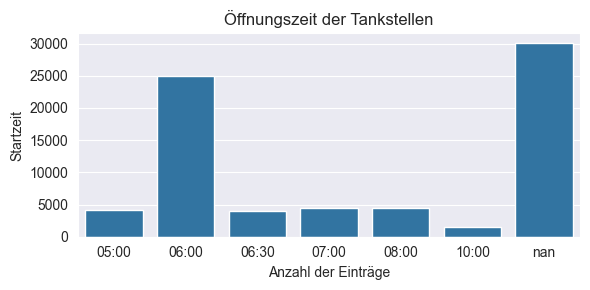

In [62]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x=df['start_time'].astype(str).fillna('Unbekannt'), order=sorted(df['start_time'].astype(str).unique()))

plt.title("Öffnungszeit der Tankstellen")
plt.xlabel("Anzahl der Einträge")
plt.ylabel("Startzeit")
plt.tight_layout()
plt.show()

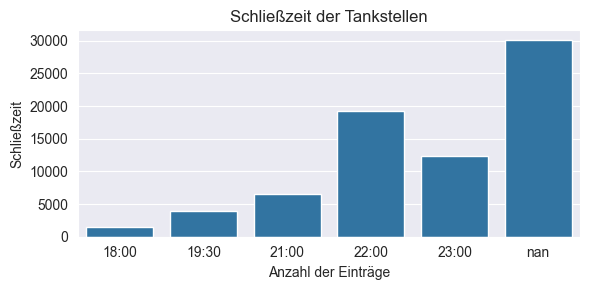

In [63]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x=df['end_time'].astype(str).fillna('Unbekannt'), order=sorted(df['end_time'].astype(str).unique()))

plt.title("Schließzeit der Tankstellen")
plt.xlabel("Anzahl der Einträge")
plt.ylabel("Schließzeit")
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Wenn eine Tankstelle keine start_time hat, dann hat sie auch keine end_time.
- Es haben 6 Tankstellen keine start_time.
- Wenn openingtimes_json = {} ist, dann fehlt die start_time.
- Wenn die Tankstellen keine start-time haben, dann werden teilweise 24 Stunden lang Werte übermittelt.
    - Nach Abgleich mit Informationen aus dem Internet sind diese Tankstellen rund um die Uhr geöffnet.
- In den Plots ist zu erkennen, dass die meisten Tankstellen, von denen die Öffnungszeiten bekannt sind um 6:00 Uhr öffnen und um 22 Uhr schließen.

### Street

In [64]:
len(df['street'].unique())
df['street'].unique()

array(['Königstraße', 'Portastraße', 'Marienstraße', 'Stiftsallee',
       'Lübbecker Str.', 'Kutenhauser Dorfstr.', 'Viktoriastraße 22',
       'Stiftstr.', 'Ringstrasse', 'Friedrich-Wilhelm-Str.',
       'Ringstraße ', 'Friedrich-Wilhelm-Str. '], dtype=object)

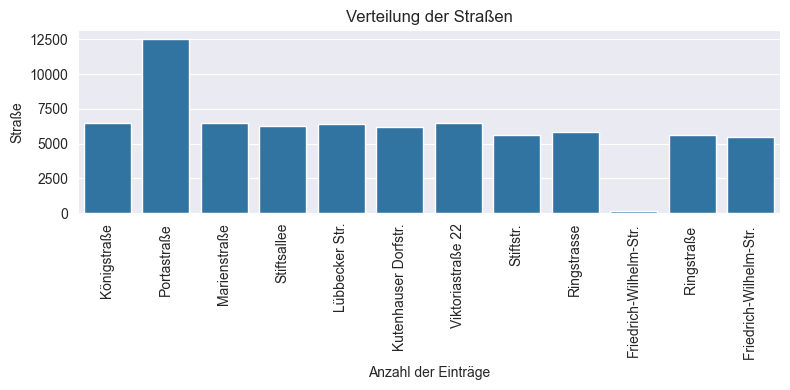

In [65]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x=df['street'])

plt.title("Verteilung der Straßen")
plt.xticks(rotation=90)
plt.xlabel("Anzahl der Einträge")
plt.ylabel("Straße")
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Es gibt 12 Straßen in dem Datensatz. Zwei Straßen sind doppelt in den Daten enthalten, jeweils mit unterschiedlichen Schreibweisen:
    - Ringstraße und Ringstrasse
    - Friedrich-Wilhelm-Str. und Friedrich-Wilhelm-Str. (zweiter Wert hat ein Leerzeichen am Ende)
    - Viktoriastraße hat noch eine Hausnummer in den Daten
- In dem Plot ist zu erkennen, dass die meisten Eintränge von der Portastraße kommen. Wenn man allerdings beachtet, dass die Ringstraße in unterschiedlichen Schreibweisen auftaucht, wäre hier ähnlich viele Werte wie bei der Portastraße.

### Date

In [66]:
print(df['date'].min())
print(df['date'].max())

2023-12-31
2024-12-31


In [67]:
print(df['date'].nunique())

367


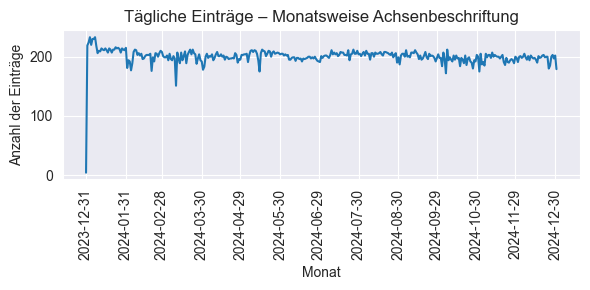

In [68]:
# Quellen: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html, https://seaborn.pydata.org/generated/seaborn.lineplot.html
plt.figure(figsize=(6, 3))
sns.lineplot(x=df['date'].value_counts().sort_index().index, y=df['date'].value_counts().sort_index().values)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title("Tägliche Einträge – Monatsweise Achsenbeschriftung")
plt.xlabel("Monat")
plt.ylabel("Anzahl der Einträge")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Auffälligkeiten:
- Der erste Eintrag in dem Datensatz ist am 31.12.23 und der letzte am 31.12.24.
- Es sind 367 einzigartige Daten in dem Datensatz - 2024 hatte als Schlatjahr 366 Tage und der erste Wert ist noch aus 2023.
- Im Plot ist zu erkennen, dass zwischen Februar und März ein Ausreißer nach unten ist.
- Zwischen Mai und und Juli gibt es sehr wenige Schwankungen bei den Einträgen.

### Name

In [69]:
print(f"Es gibt {len(df['station_uuid'].unique()) - len(df['name'].unique())} Tankstellen mit dem gleichen Namen, aber unterschiedlichen IDs")
print(f"Dabei handelt es sich um die Tankstellen: \n {df.drop_duplicates(subset='station_uuid')['name'].value_counts()[lambda x: x > 1]}")

Es gibt 2 Tankstellen mit dem gleichen Namen, aber unterschiedlichen IDs
Dabei handelt es sich um die Tankstellen: 
 name
ORLEN Tankstelle    2
Lars Thiele         2
Name: count, dtype: int64


name
ORLEN Tankstelle             12976
Lars Thiele                  12690
star Tankstelle               6516
OIL! Tankstelle Minden        6469
Calpam Tankstelle             6171
CLASSIC Minden(CLASSIC)       6016
TAS MI Rinstr.                5838
Shell Minden Stiftstr. 57     5649
Aral Tankstelle               5647
Tankstelle Harting Minden     5492
Iboil Minden                   125
Name: count, dtype: int64


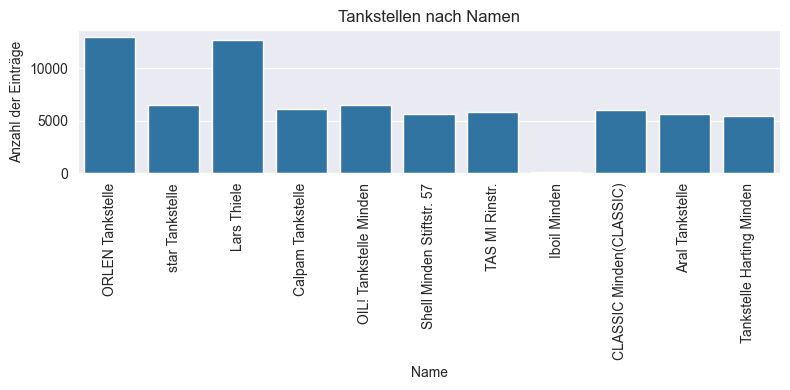

In [70]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.countplot.html
print(df['name'].value_counts(dropna=False))
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x=df['name'])

plt.title("Tankstellen nach Namen")
plt.xticks(rotation=90)
plt.xlabel("Name")
plt.ylabel("Anzahl der Einträge")
plt.tight_layout()
plt.show()

### City

In [71]:
print(f"Es wird die Stadt {df['city'].unique()} betrachtet.")

Es wird die Stadt ['Minden'] betrachtet.


### Weekday

In [72]:
df['weekday'].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

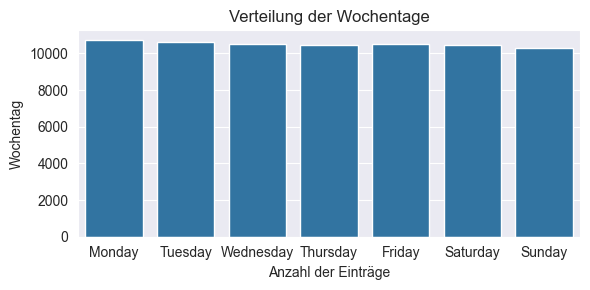

In [73]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x=df['weekday'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.title("Verteilung der Wochentage")
plt.xlabel("Anzahl der Einträge")
plt.ylabel("Wochentag")
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Es ist zu erkennen, dass die Einträge auf die Wochentage sehr ähnlich verteilt sind

### Hour

In [74]:
df['hour'].unique()

array(['23:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00',
       '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00',
       '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00',
       '19:00:00', '20:00:00', '22:00:00', '04:00:00', '21:00:00',
       '03:00:00', '00:00:00', '02:00:00', '01:00:00'], dtype=object)

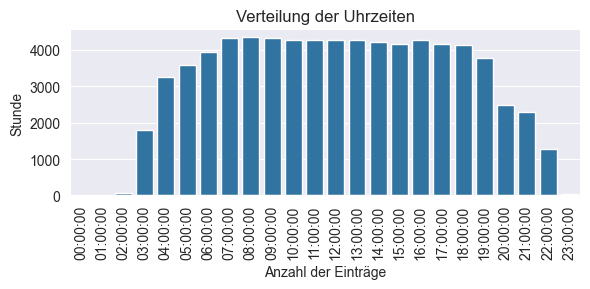

In [75]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x=df['hour'], order=sorted(df['hour'].dropna().unique()))

plt.title("Verteilung der Uhrzeiten")
plt.xlabel("Anzahl der Einträge")
plt.ylabel("Stunde")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Im Plot ist zu erkennen, dass die Einträge zwischen 7:00 Uhr und 18:00 ähnlich sind.

## Kraftstoffe

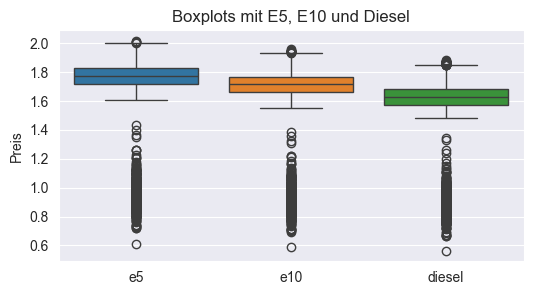

In [76]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.boxplot.html
plt.figure(figsize=(6, 3))
sns.boxplot(data=df[['e5', 'e10', 'diesel']])

plt.title('Boxplots mit E5, E10 und Diesel')
plt.ylabel('Preis')
plt.show()
plt.close()

Auffälligkeiten
- In dem Plot ist zu erkennen, dass alle Kraftstoffe Ausreißer nach oben und unten haben.
    - Die unteren Ausreißer sind stärker verteilt.
    - Die oberen Ausreißer sind nahe dem oberen Quantil.
- Die Kraftstoffe haben ähnlich symetrische Preisverteilungen.
    - Die Streuungen sind ähnlich verteilt.
- Der Mittelwert von E5 ist am höchsten, dann E10 und am gerinster ist der Mittelwert von Diesel.

### E5

In [77]:
print(df['e5'].describe())

count    73589.000000
mean         1.768951
std          0.097200
min          0.609667
25%          1.714000
50%          1.774000
75%          1.829000
max          2.016500
Name: e5, dtype: float64


In [78]:
print(df['e5'].count()- (df[df['e5'] > 1.0])['e5'].count())

308


In [79]:
print((df[df['e5'] > 1.0])['e5'].describe())

count    73281.000000
mean         1.772584
std          0.079489
min          1.000063
25%          1.715667
50%          1.774000
75%          1.829000
max          2.016500
Name: e5, dtype: float64


In [80]:
print(f"Die Tankstelle {df[df['e5'] < 1.0]['station_uuid'].unique()} hat E5 unter 1 €. ")
print(f"An {len(df[df['e5'] < 1.0]['date'].unique())} Tagen kommt es zu Preisen unter 1 €. Zum erstenmal am {df[df['e5'] < 1.0]['date'].unique().min()} und zum letzten mal am {df[df['e5'] < 1.0]['date'].unique().max()}")

Die Tankstelle ['2dbf6b64-a83d-4630-ad83-c16015b8efa4'] hat E5 unter 1 €. 
An 21 Tagen kommt es zu Preisen unter 1 €. Zum erstenmal am 2024-01-20 und zum letzten mal am 2024-04-03


Auffälligkeiten
- E5 hat keine fehlenden Werte
- Mittelwert 1,7690 €
- Standardabweichung 0,0972 €, also eine geringe Streuung
- Preise liegen zwischen 1,71 € und 1,83 €

### E10

In [81]:
print(df['e10'].describe())

count    73589.000000
mean         1.711247
std          0.096017
min          0.589667
25%          1.659000
50%          1.715667
75%          1.769000
max          1.956500
Name: e10, dtype: float64


In [82]:
print(df['e10'].count()- (df[df['e10'] > 1.0])['e10'].count())

353


In [83]:
print((df[df['e10'] > 1.0])['e10'].describe())

count    73236.000000
mean         1.715216
std          0.077194
min          1.000250
25%          1.659000
50%          1.716500
75%          1.769000
max          1.956500
Name: e10, dtype: float64


In [84]:
print(f"Die Tankstelle {df[df['e10'] < 1.0]['station_uuid'].unique()} hat E10 unter 1 €. ")
print(f"An {len(df[df['e10'] < 1.0]['date'].unique())} Tagen kommt es zu Preisen unter 1 €. Zum erstenmal am {df[df['e10'] < 1.0]['date'].unique().min()} und zum letzten mal am {df[df['e10'] < 1.0]['date'].unique().max()}")

Die Tankstelle ['2dbf6b64-a83d-4630-ad83-c16015b8efa4'] hat E10 unter 1 €. 
An 21 Tagen kommt es zu Preisen unter 1 €. Zum erstenmal am 2024-01-20 und zum letzten mal am 2024-04-03


Auffälligkeiten:
- E10 ht keine fehlenden Werte
- Mittelwert 1,71 €
- Standardabweichung 0,096 €, also eine geringe Streuung
- Preise liegen zwischen 1,66 € bis 1,77 €

### Diesel

In [85]:
print(df['diesel'].describe())

count    73589.000000
mean         1.628707
std          0.092175
min          0.563000
25%          1.574000
50%          1.629000
75%          1.684000
max          1.881500
Name: diesel, dtype: float64


In [86]:
print(df['diesel'].count()- (df[df['diesel'] > 1.0])['diesel'].count())

379


In [87]:
print((df[df['diesel'] > 1.0])['diesel'].describe())

count    73210.000000
mean         1.632663
std          0.074006
min          1.000400
25%          1.574000
50%          1.631500
75%          1.685667
max          1.881500
Name: diesel, dtype: float64


In [88]:
print(f"Die Tankstelle {df[df['diesel'] < 1.0]['station_uuid'].unique()} hat Dieselpreise unter 1 €. ")
print(f"An {len(df[df['diesel'] < 1.0]['date'].unique())} Tagen kommt es zu Preisen unter 1 €. Zum erstenmal am {df[df['diesel'] < 1.0]['date'].unique().min()} und zum letzten mal am {df[df['diesel'] < 1.0]['date'].unique().max()}")

Die Tankstelle ['2dbf6b64-a83d-4630-ad83-c16015b8efa4'] hat Dieselpreise unter 1 €. 
An 21 Tagen kommt es zu Preisen unter 1 €. Zum erstenmal am 2024-01-20 und zum letzten mal am 2024-04-03


Auffälligkeiten
- Diesel hat keine fehlenden Werte
- Mittelwert 1,6287 €
- Standardabweichung 0,0922 €, also eine geringe Streuung
- Die meisten Preise liegen zwischen 1,57 € bis 1,68 €
- Es gibt 379 Werte, bei denen der Dieselpreis unter 1 € liegt.
    - Werte unter 1 € kommen von einer Tankstelle: 2dbf6b64-a83d-4630-ad83-c16015b8efa4
- Bei Ausschluss der Ausreißer:
    - Mittelwert 1,6327 €
    - Standardabweichung 0,074 €
    - Die meisten Preise liegen zwischen 1,57 € bis 1,69 €


### dieselchange

In [89]:
print(df['dieselchange'].value_counts(dropna=False))

dieselchange
1.0    70260
0.0     2703
3.0      472
2.0      154
Name: count, dtype: int64


### e5change

In [90]:
print(df['e5change'].value_counts(dropna=False))

e5change
1.0    71434
0.0     1544
3.0      472
2.0      139
Name: count, dtype: int64


### e10change

In [91]:
print(df['e10change'].value_counts(dropna=False))

e10change
1.0    71458
0.0     1522
3.0      472
2.0      137
Name: count, dtype: int64


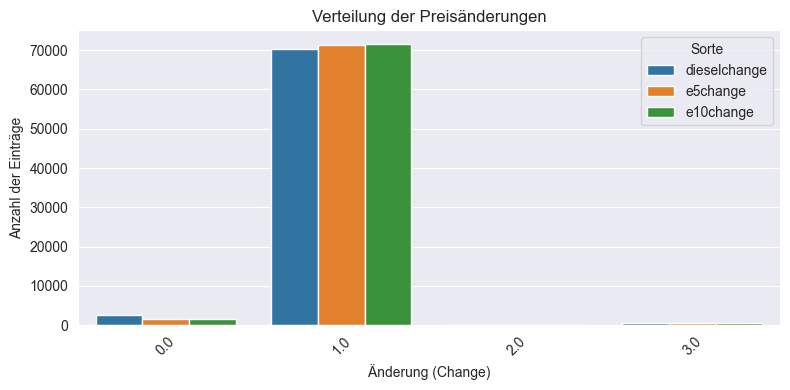

In [92]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.figure(figsize=(8, 4))
sns.countplot(
    data=pd.melt(df, value_vars=['dieselchange', 'e5change', 'e10change'],
                 var_name='Sorte', value_name='Change'),x='Change',hue='Sorte')
plt.title("Verteilung der Preisänderungen")
plt.xlabel("Änderung (Change)")
plt.ylabel("Anzahl der Einträge")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Im Plot ist zu erkennen, dass in den meisten Stunden hat eine Änderung je Sorte stattgefunden
- Zu manchen Stunden ist keine Änderung vorgenommen worden und bei noch weniger drei Änderungen. Am seltesten wurden zwei Änderungen vorgenommen.

### postcode

In [93]:
print(f"Die Tankstellen liegen in den Postleitzahlen {df['post_code'].unique()}")

Die Tankstellen liegen in den Postleitzahlen [32427 32429 32425 32423]


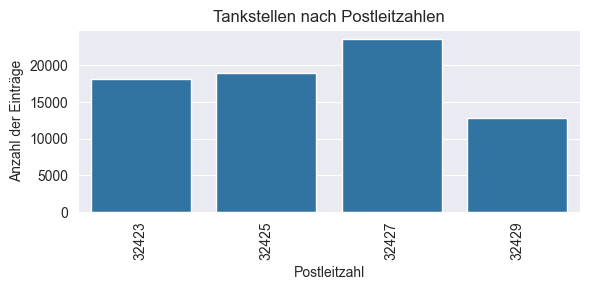

In [94]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x=df['post_code'])

plt.title("Tankstellen nach Postleitzahlen")
plt.xticks(rotation=90)
plt.xlabel("Postleitzahl")
plt.ylabel("Anzahl der Einträge")
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Die meisten Tankstellen sind in dem Gebiet 32427, die wenigsten in 32429

### first_active

In [95]:
print(df['first_active'].unique())

['2014-03-18 16:45:31+01' '2016-01-19 00:00:01+01'
 '2016-01-24 00:00:01+01' '2019-06-19 23:30:07+02']


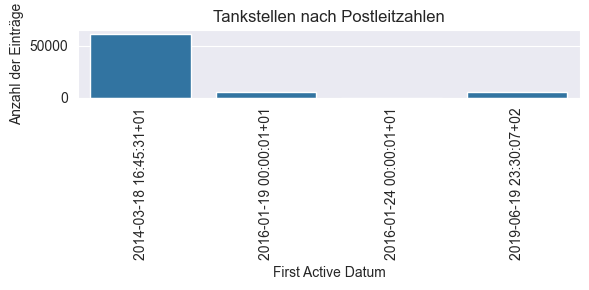

In [96]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x=df['first_active'])

plt.title("Tankstellen nach Postleitzahlen")
plt.xticks(rotation=90)
plt.xlabel("First Active Datum")
plt.ylabel("Anzahl der Einträge")
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Es gibt 4 verschiedene Werte, zu denen die Tankstellen zum ersten mal aktiv sind.
- Fast alle Werte sind am 18.03.2014.

### longitude & latitude

In [97]:
print(df['longitude'].describe())
print(df['latitude'].describe())

count    73589.000000
mean         8.909475
std          0.013325
min          8.892210
25%          8.901323
50%          8.904580
75%          8.915457
max          8.938090
Name: longitude, dtype: float64
count    73589.000000
mean        52.293928
std          0.016252
min         52.273804
25%         52.282530
50%         52.288800
75%         52.303850
max         52.333858
Name: latitude, dtype: float64


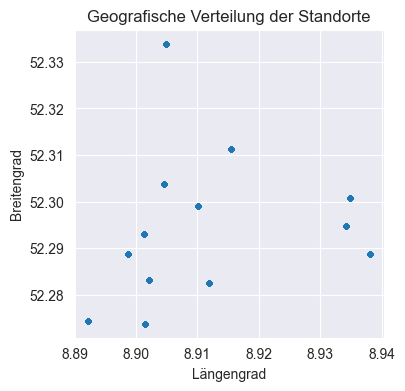

In [98]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
plt.figure(figsize=(4, 4))
plt.scatter(df['longitude'], df['latitude'], alpha=0.5, s=10)
plt.title("Geografische Verteilung der Standorte")
plt.xlabel("Längengrad")
plt.ylabel("Breitengrad")
plt.grid(True)
plt.show()

Auffälligkeiten:
- Einer der Tankstellen hat einen deutlich niedrigeren Breitegrad
- Drei Tankstellen haben einen etwas höheren Längengrad